### Check the basins in the HMA region.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from utils.scatter_plot import scatter_plot


In [2]:
path_basins_lehner2013 = 'data/basins/asia_Lehner2013_levels/hybas_as_lev03_v1c.gpkg'  ### HydroSHEDS dataset
path_basins_lehner2013_l4 = 'data/basins/asia_Lehner2013_levels/hybas_as_lev04_v1c.gpkg'  ### HydroSHEDS dataset
path_basins_lehner2013_l5 = 'data/basins/asia_Lehner2013_levels/hybas_as_lev05_v1c.gpkg'  ### HydroSHEDS dataset
path_hma_gtng = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_lakes = 'data/lakes/HydroLakes_v10_hma.gpkg'


In [3]:
hma_gtng = gpd.read_file(path_hma_gtng)
hma_gtng_merged = hma_gtng.dissolve()
hma_lakes = gpd.read_file(path_lakes)
hma_basins_lehner2013 = gpd.read_file(path_basins_lehner2013)
hma_basins_lehner2013_l4 = gpd.read_file(path_basins_lehner2013_l4)
hma_basins_lehner2013_l5 = gpd.read_file(path_basins_lehner2013_l5)
hma_basins_lehner2013.head(2)


,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,4030000010,0,4030000010,4030000010,0.0,0.0,105274.5,105274.5,421,0,1,0,1,"MULTIPOLYGON (((138.20694 54.69583, 138.20201 ..."
1,4030000880,0,4030000880,4030000880,0.0,0.0,2238972.5,2238972.5,422,0,0,1,2,"MULTIPOLYGON (((115.33333 43.95000, 115.33333 ..."


In [4]:
hma_basins_lehner2013_l4 = gpd.overlay(hma_basins_lehner2013_l4, hma_gtng_merged, how='intersection')
hma_basins_lehner2013_l5 = gpd.overlay(hma_basins_lehner2013_l5, hma_gtng_merged, how='intersection')
# hma_basins_lehner2013_l4 = hma_basins_lehner2013_l4[hma_basins_lehner2013_l4.within(hma_gtng_merged.unary_union)]
# hma_basins_lehner2013_l5 = hma_basins_lehner2013_l5[hma_basins_lehner2013_l5.within(hma_gtng_merged.unary_union)]
hma_basins_lehner2013_l5.shape


(180, 18)

Text(0.5, 1.0, 'hma basins')

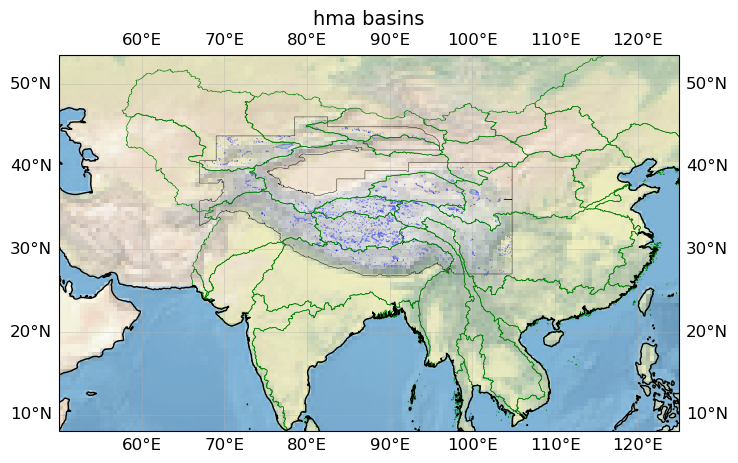

In [5]:
plt.rcParams.update({'font.size':12})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([50.0, 125.0, 8.0, 47.0])
# ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng_merged.plot(ax=ax, edgecolor='black', facecolor='none', linestyle='-', linewidth=0.3)
hma_basins_lehner2013.plot(ax=ax, edgecolor='green', facecolor='none', linestyle='-', linewidth=0.4)
hma_lakes.plot(ax=ax, edgecolor='blue', linewidth=0.5, alpha=0.3)
ax.stock_img(); ax.coastlines()
ax.set_title('hma basins', fontsize=14)

Text(0.5, 1.0, 'hma lehner2013 basins for different level')

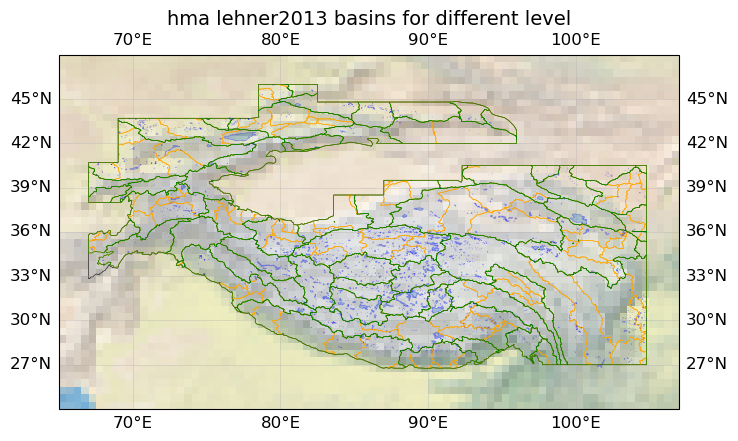

In [6]:
plt.rcParams.update({'font.size':12})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng_merged.plot(ax=ax, edgecolor='black', facecolor='none',  linestyle='-', linewidth=0.4)
hma_basins_lehner2013_l5.plot(ax=ax, edgecolor='orange', facecolor='none', linestyle='-', linewidth=0.4)
hma_basins_lehner2013_l4.plot(ax=ax, edgecolor='green', facecolor='none', linestyle='-', linewidth=0.4)
hma_lakes.plot(ax=ax, edgecolor='blue', linewidth=0.5, alpha=0.3)
ax.stock_img(); 
ax.set_title('hma lehner2013 basins for different level', fontsize=14)


#### Statistic of the lake area of each basin.
1. For the level-4 basin.


In [7]:
### statistic of the lakes area in each basin.
hma_basins_lehner2013_l4['area_lakes'] = np.nan
hma_basins_lehner2013_l4['num_lakes'] = np.nan
hma_basins_lehner2013_l4.reset_index(drop=True, inplace=True)
for i in range(hma_basins_lehner2013_l4.shape[0]):
    basin = hma_basins_lehner2013_l4['geometry'][i]
    ids = np.where(basin.contains(hma_lakes['geometry'].centroid))[0]
    area_basin = hma_lakes.loc[ids, 'Lake_area'].sum()            # Sum the area of lakes
    hma_basins_lehner2013_l4.loc[i, 'area_lakes'] = area_basin    # Area of lakes
    hma_basins_lehner2013_l4.loc[i, 'num_lakes'] = len(ids)       # Number of lakes


Text(0.5, 1.0, 'Lakes in hma level-4 basins')

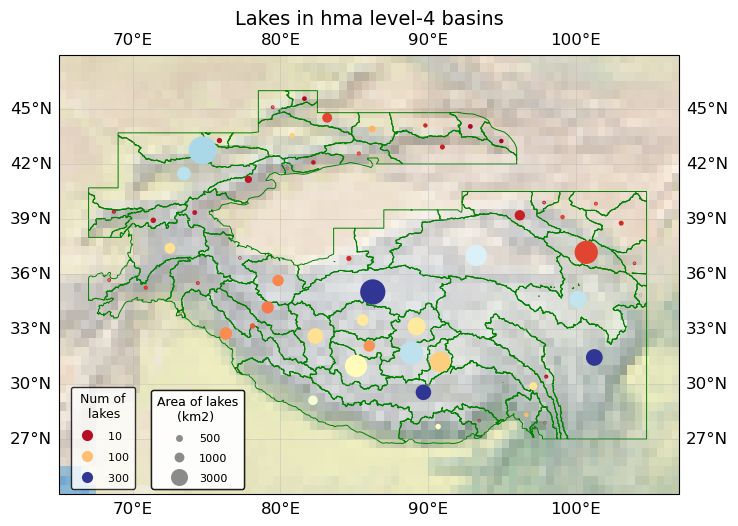

In [8]:

basin_centers = hma_basins_lehner2013_l4.geometry.representative_point()
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_basins_lehner2013_l4.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
plt.rcParams.update({'font.size': 9})
scatter_plot(basin_centers.x.values, basin_centers.y.values, 
                          size=hma_basins_lehner2013_l4['area_lakes'].values,  
                          color=hma_basins_lehner2013_l4['num_lakes'].values, ax=ax, 
                          title_legend_color='Num of\n  lakes', 
                          title_legend_size='Area of lakes\n     (km2)',
                          labels_size = [500, 1000, 3000], labels_color = [10, 100, 300], 
                          scale_size = 1/20, color_range=[0, 300], cmap="RdYlBu")

ax.set_title('Lakes in hma level-4 basins', fontsize=14)


2. For the level-5 basin.

In [9]:
### statistic of the reserviors area in each sub hma region.
hma_basins_lehner2013_l5['area_lakes'] = np.nan
hma_basins_lehner2013_l5['num_lakes'] = np.nan
hma_basins_lehner2013_l5.reset_index(drop=True, inplace=True)
for i in range(hma_basins_lehner2013_l5.shape[0]):
    basin = hma_basins_lehner2013_l5['geometry'][i]
    ids = np.where(basin.contains(hma_lakes['geometry'].centroid))[0]
    area_basin = hma_lakes.loc[ids, 'Lake_area'].sum()   # Sum the area of lakes
    hma_basins_lehner2013_l5.loc[i, 'area_lakes'] = area_basin    
    hma_basins_lehner2013_l5.loc[i, 'num_lakes'] = len(ids)       # Number of lakes

Text(0.5, 1.0, 'Lakes in hma level-5 basins')

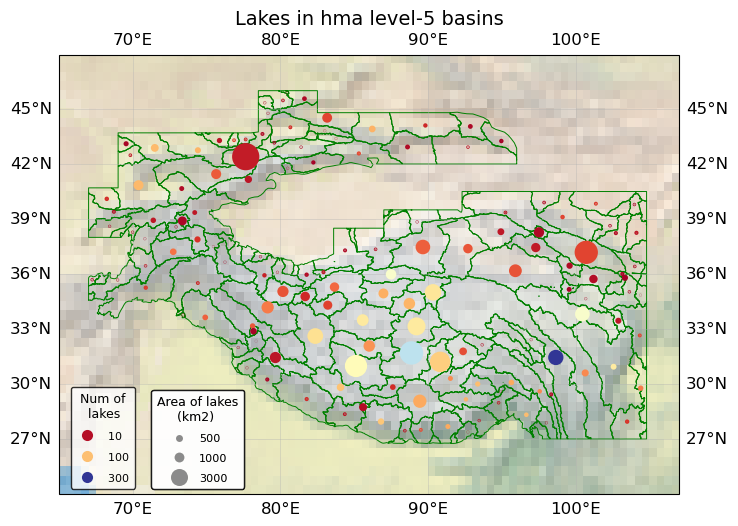

In [10]:
basin_centers = hma_basins_lehner2013_l5.geometry.representative_point()
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_basins_lehner2013_l5.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
plt.rcParams.update({'font.size': 9})
scatter_plot(basin_centers.x.values, basin_centers.y.values, 
                          size=hma_basins_lehner2013_l5['area_lakes'].values,  
                          color=hma_basins_lehner2013_l5['num_lakes'].values, ax=ax, 
                          title_legend_color='Num of\n  lakes', 
                          title_legend_size='Area of lakes\n     (km2)',
                          labels_size = [500, 1000, 3000], labels_color = [10, 100, 300], 
                          scale_size = 1/20, color_range=[0, 300], cmap="RdYlBu")
ax.set_title('Lakes in hma level-5 basins', fontsize=14)


<GeoAxes: >

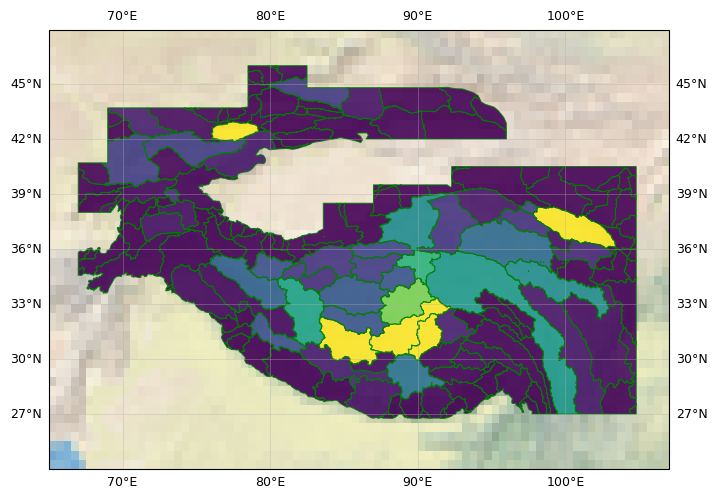

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_basins_lehner2013_l5.plot(ax = ax, column='area_lakes', \
                                    cmap='viridis', edgecolor='green', \
                                    alpha=0.9,  lw=0.7, vmin=0, vmax=3000)
